# Ensemble Classifer Model

## It consist of Logistic regression, K-NN, Decison Tree, Support Vector Machine and Artifical Neural Network(ANN). 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import os
import sys
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
os.getcwd()

'C:\\Users\\Ganga\\Desktop\\Research\\CDCDiab_2.0\\Code'

In [3]:
os.chdir('C:\\Users\\Ganga\\Desktop\\Research\\CDCDiab_2.0\\Code')

In [5]:
# Importing the DataSet
CDCDataset = pd.read_csv('C:\\Users\\Ganga\\Desktop\\Research\\CDCDiab_2.0\\Data\\07-08\\07_08Final.csv')
CLANN = CDCDataset

In [6]:
CLANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149 entries, 0 to 10148
Columns: 3753 entries, Unnamed: 0 to WHQ150
dtypes: float64(3738), int64(2), object(13)
memory usage: 290.6+ MB


In [7]:
# Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

In [8]:
CLANN.shape

(10149, 3753)

In [9]:
CLANN.head(10)

,Unnamed: 0,SEQN,AUXRR101,AUXRR102,AUXRR103,AUXRR104,AUXRR105,AUXRR106,AUXRR107,AUXRR108,...,WHD100Q,WHD100R,WHD100S,WHQ210,WHD220,WHD110,WHD120,WHD130,WHD140,WHQ150
0,0,41475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.0,250.0,180.0,62.0,308.0,62.0
1,1,41476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,41477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,205.0,175.0,68.0,205.0,40.0
3,3,41478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,41479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,130.0,120.0,66.0,150.0,47.0
5,5,41480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,41481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,175.0,20.0
7,7,41482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,30.0,190.0,143.0,68.0,238.0,63.0
8,8,41483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,275.0,260.0,71.0,300.0,50.0
9,9,41484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#CLANN = CLANN.drop(['RXDDRUG','RXDDRGID'], axis=1)

In [45]:
# Dropping the missing value
#CLANN = CLANN.dropna(axis=0, how='any')

In [10]:
CLANN.isnull().sum()

Unnamed: 0        0
SEQN              0
AUXRR101       9010
AUXRR102       9010
AUXRR103       9010
AUXRR104       9010
AUXRR105       9010
AUXRR106       9010
AUXRR107       9010
AUXRR108       9010
AUXRR109       9010
AUXRR110       9010
AUXRR111       9010
AUXRR112       9010
AUXRR113       9010
AUXRR114       9010
AUXRR115       9010
AUXRR116       9010
AUXRR117       9010
AUXRR118       9010
AUXRR119       9010
AUXRR120       9010
AUXRR121       9010
AUXRR122       9010
AUXRR123       9010
AUXRR124       9010
AUXRR125       9010
AUXRR126       9010
AUXRR127       9010
AUXRR128       9010
              ...  
WHQ270         7566
WHQ280A       10068
WHQ280B       10109
WHQ280C       10099
WHQ280D       10064
WHQ280E       10128
WHQ090         6228
WHD100A        9910
WHD100B       10010
WHD100C        9953
WHD100D        9892
WHD100E       10093
WHD100F       10130
WHD100G       10141
WHD100J       10143
WHD100L       10145
WHD100M       10023
WHD100N       10143
WHD100O       10054


In [49]:
CLANN.describe()

,Unnamed: 0,SEQN,AUXRR101,AUXRR102,AUXRR103,AUXRR104,AUXRR105,AUXRR106,AUXRR107,AUXRR108,...,WHD100Q,WHD100R,WHD100S,WHQ210,WHD220,WHD110,WHD120,WHD130,WHD140,WHQ150
count,10149.000000,10149.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,...,3.0,8.0,3.0,3921.000000,3.640000e+03,4374.000000,5181.000000,3026.000000,6163.000000,6072.000000
mean,5074.000000,46549.000000,11.991220,11.670764,11.570676,11.877085,12.597893,13.441615,14.269535,14.995610,...,43.0,44.0,45.0,1.726090,1.040386e+03,528.752172,591.309014,458.969597,336.787766,930.449934
std,2929.908275,2929.908275,6.324966,6.230596,6.188959,6.197028,6.151274,6.209358,6.437222,6.344876,...,0.0,0.0,0.0,0.484931,1.002959e+04,1843.602469,2035.561769,1932.247982,1179.995878,9385.191105
min,0.000000,41475.000000,-138.000000,-133.000000,-130.000000,-127.000000,-125.000000,-122.000000,-117.000000,-110.000000,...,43.0,44.0,45.0,1.000000,5.397605e-79,75.000000,75.000000,53.000000,90.000000,11.000000
25%,2537.000000,44012.000000,10.000000,10.000000,10.000000,10.000000,11.000000,12.000000,12.000000,13.000000,...,43.0,44.0,45.0,1.000000,1.000000e+01,140.000000,125.000000,64.000000,157.000000,26.000000
50%,5074.000000,46549.000000,12.000000,12.000000,12.000000,12.000000,13.000000,14.000000,14.000000,15.000000,...,43.0,44.0,45.0,2.000000,2.000000e+01,165.000000,145.000000,67.000000,185.000000,39.000000
75%,7611.000000,49086.000000,14.000000,14.000000,14.000000,14.000000,15.000000,15.000000,16.000000,17.000000,...,43.0,44.0,45.0,2.000000,3.000000e+01,195.000000,175.000000,70.000000,220.000000,55.000000
max,10148.000000,51623.000000,48.000000,41.000000,40.000000,49.000000,42.000000,39.000000,62.000000,38.000000,...,43.0,44.0,45.0,9.000000,9.999900e+04,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000


In [72]:
# Don't to Don't know
CLANN= CLANN.replace(999999,9)

In [73]:
# Don't to Don't know
CLANN= CLANN.replace(999,9)

In [74]:
# refused to Don't know
CLANN= CLANN.replace(777,9)

In [75]:
# don't know to No
CLANN= CLANN.replace(9,2)

In [76]:
# Borderline to yes
CLANN= CLANN.replace(3,1)

In [77]:
CLANN.shape

(10149, 3753)

## Cholestrol Features

In [11]:
# Locking the data set and selecting the X(Independent) and Y (Dependent) Variable 
Cholestrol_vars = CLANN.loc[:,['BPQ060','BPQ080','BPQ070','BPQ090D','DIQ175J','DID320','DID330','LBDHDD','LBDHDDSI','LBDLDL','LBDLDLSI','LBXTC','LBDTCSI','LBXSCH','LBDSCHSI','DR1ICHOL','DR2ICHOL','DRQSDT2','DR1TCHOL','DR2TCHOL','DS1ICHOL','DS2ICHOL','DS1TCHOL','DS2TCHOL','DSQ128J','DSQICHOL','DSQTCHOL']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [12]:
Cholestrol_vars.describe().to_csv('Cholestrol_States.csv')

# # Heart

In [13]:
# Locking the data set for Heart attack
Heart_vars = CLANN.loc[:,['CDQ009F','CDQ009G','MCQ160b','MCQ180b','MCQ160c','MCQ180c','MCQ160D','MCQ160e','MCQ180e','MCQ160f','MCQ180f','MCQ300a']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [14]:
Heart_vars.describe().to_csv('Heart_States.csv')

# Blood Pressure

In [15]:
# Locking the data set for Blood Pressure 
BP_vars = CLANN.loc[:,['BPQ020','BPQ030','BPD035','DIQ175H']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [16]:
BP_vars.describe().to_csv('BP_States.csv')

#  Target Feature (Diabetes)

In [17]:
# Locking the data set for Diabetes
Diab_vars = CLANN.loc[:,['DIQ010','DID040','DIQ160','DIQ170','DIQ172','DIQ175I','DIQ175L','DIQ175M','DIQ175N','DIQ175S','DIQ070','DIQ230','DIQ240','DID260','DIQ275','DIQ280','DIQ291','DRQSDT7','DSD128T']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [18]:
Diab_vars.describe().to_csv('Diab_States.csv')

# Misc.

In [19]:
# Locking the data set for Diabetes
Misc_vars = CLANN.loc[:,['DIQ175K','DIQ175L','DIQ175M','DIQ175N','DIQ175O','DIQ175S','DIQ070','DIQ230','DIQ240','DID260','DIQ275','DIQ280','DIQ291','DRQSDT7','DSD128T']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [20]:
Misc_vars.describe().to_csv('Misc_States.csv')

## Demographich and socia Economic

In [24]:
# Locking the data set for Demo and Socio Economic 
Demo_vars = CLANN.loc[:,['DIQ175E','RIDAGEYR','RIDAGEMN','RIDRETH1']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [25]:
Demo_vars.describe().to_csv('Demo_States.csv')

In [58]:
#CLANN = CLANN.dropna(axis=0, how='any')

In [59]:
CLANN.describe()

(0, 3753)

In [ ]:
# Remove dependent variable from the feature space
#X = X.drop(['DIQ010'], axis=1)
#print(X.shape)

In [ ]:
# Splitting the dataset into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [198]:
#CLANN = pd.read_csv('datasetclann.csv')

In [199]:
#CLANN = CLANN.to_csv("datasetclann.csv")

In [215]:
X = X.astype('int64',copy=False)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 10148
Columns: 163 entries, SEQN to SMD410
dtypes: int64(163)
memory usage: 7.9 MB


In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 10148
Columns: 163 entries, SEQN to SMD410
dtypes: int64(163)
memory usage: 7.9 MB


In [225]:
# Scaling the feature in standard form.
X = StandardScaler().fit_transform(X)

#Normalizing the dataset
#from sklearn import preprocessing
#X = preprocessing.normalize(X)
#y = preprocessing.normalize(y)

In [89]:
from sklearn.preprocessing import LabelEncoder
cat = LabelEncoder()
y = cat.fit_transform(y) 
#y = pd.get_dummies(y)
#y = pd.Categorical( y,categories=["0","1"])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
print(y)

[1 1 0 ... 1 1 1]


In [96]:
print(X)

       BMXARMC  DRQSDIET  RIDAGEMN  CBD070        CBD090  CBD150  \
0         45.2       1.0     751.0   320.0  4.000000e+01     5.0   
1         17.1       2.0      81.0   900.0  5.397605e-79    15.0   
2         34.1       2.0     859.0   400.0  8.000000e+01    20.0   
4         33.2       2.0     629.0   550.0  5.397605e-79    15.0   
5         20.9       2.0      81.0   500.0  5.397605e-79    15.0   
6         31.0       2.0     254.0   100.0  1.000000e+01    15.0   
7         32.8       1.0     778.0  1071.0  1.600000e+02    20.0   
8         40.5       1.0     803.0   200.0  5.397605e-79    10.0   
10        30.7       2.0     360.0   342.0  2.500000e+01     8.0   
11        35.3       2.0     734.0   728.0  4.280000e+02     5.0   
12        29.9       2.0     331.0    50.0  5.397605e-79     5.0   
13        17.0       2.0      61.0   400.0  5.000000e+01    10.0   
14        37.8       2.0     482.0   150.0  5.397605e-79    10.0   
15        31.2       2.0     802.0   300.0  5.00

In [99]:
X_train.shape,

((4428, 10),)

In [100]:
X_test.shape

(1899, 10)

In [101]:
#y_train=np.array(y_train)
#y_test=np.array(y_test)

In [102]:
#print(y_test)

# Logistic Regression Model

In [103]:
#Fitting Logistic Regression trainning data
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
regressor = LogisticRegression()
rfe = RFE(regressor, 15)
rfe = rfe.fit(X_train,y_train)
#X_train, X_test, y_train, y_test = train_test_split(rfe,y,test_size=0.30,random_state=0)
#rfe = RFE(regressor,20 )
#rfe = rfe.fit(X, Y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [104]:
print(rfe.ranking_)

[1 1 1 1 1 1 1 1 1 1]


In [105]:
# Need to select only the true variables
print(rfe)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)


In [106]:
# Locking the data set and selecting the X(Independent) and Y (Dependent) Variable 
X= CLANN.loc[:,['BMXARMC','DRQSDIET','RIDAGEMN','CBD070','CBD090','CBD150','DBD910','HSAQUEX','HUQ010','RXDUSE']]
y= CLANN.loc[:,['DIQ010']]

# Splitting the dataset into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [107]:
#y_train=np.array(y_train)
#y_test=np.array(y_test)

In [108]:
# fit model with new selected variable
regressor = LogisticRegression(random_state = 0)
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# Predicting the Training data set accuracy
y_pred = regressor.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
print('Test Accuracy score:' , accuracy_score(y_test, y_pred))

Test Accuracy score: 0.9125855713533438


In [111]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.00      0.00      0.00       163
         No       0.91      1.00      0.95      1736

avg / total       0.84      0.91      0.87      1899



In [112]:
ypred = np.array(y_pred)
y = np.array(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y,ypred, pos_label=2)
roc_auc= metrics.auc(fpr,tpr)

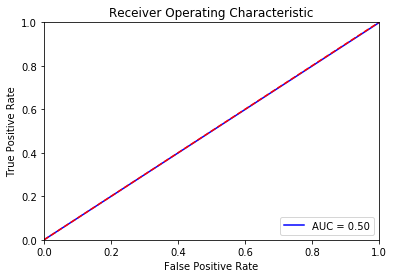

In [113]:
from matplotlib import pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.49913594470046085

#  K-Nearest Neighbors classifier

In [61]:
# Importing the KNN model classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

In [62]:
# Fitting the Model
knn = knn.fit(X_train, y_train.values.ravel())

In [63]:
#Prediction
y_pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test, y_pred))

Accuracy score: 0.9141653501843076


In [65]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.00      0.00      0.00       163
         No       0.91      1.00      0.96      1736

avg / total       0.84      0.91      0.87      1899



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine Model

In [66]:
# Importing the SVM model classifier
from sklearn.svm import SVC
Model_svc = SVC(gamma='auto')

In [67]:
# Fitting the Model
Model_svc.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
#Prediction
y_pred = Model_svc.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test, y_pred))

Accuracy score: 0.9141653501843076


In [70]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.00      0.00      0.00       163
         No       0.91      1.00      0.96      1736

avg / total       0.84      0.91      0.87      1899



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Cross Validation using k-fold (10 fold cross validation) 

In [71]:
# Cross Validation (Training dataset)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(Model_svc,X_train,y_train.values.ravel(),cv=10)

scores

array([0.90990991, 0.90990991, 0.91196388, 0.91196388, 0.91196388,
       0.91196388, 0.91176471, 0.91176471, 0.91176471, 0.91176471])

In [72]:
# Cross Validation (Test dataset)
scores = cross_val_score(Model_svc,X_test,y_test.values.ravel(),cv=10)

scores

array([0.91099476, 0.91099476, 0.91099476, 0.91578947, 0.91578947,
       0.91578947, 0.91534392, 0.91534392, 0.91534392, 0.91534392])

In [73]:
from sklearn.metrics import accuracy_score
print('Accuracy score: %0.3f (+/- %0.3f)'%  (scores.mean(), scores.std()*2 ))

Accuracy score: 0.914 (+/- 0.004)


In [74]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test, y_pred))

Accuracy score: 0.9141653501843076


# Decision Tree Classifcation model

In [75]:
# Imprting the Model and instantiating it into clf i.e. short name for classification
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()

In [76]:
clf_DT = clf_DT.fit(X_train, y_train)

In [77]:
y_pred = clf_DT.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test,y_pred))
#print("Test set score: %f" % clf.score(y_test, y_pred))

Accuracy score: 0.875724065297525


In [79]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.27      0.26      0.26       163
         No       0.93      0.93      0.93      1736

avg / total       0.87      0.88      0.87      1899



In [81]:
# Confusion matrix output
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  42  121]
 [ 115 1621]]


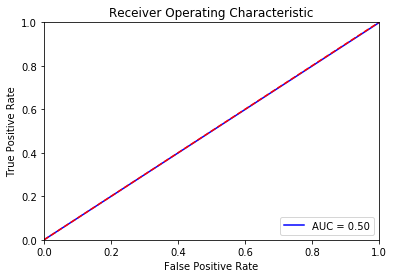

In [80]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Cross Validation using k-fold (10 fold cross validation)

In [508]:
# Cross Validation Training dataset

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_DT,X_train,y_train.values.ravel(),cv=10)

scores

array([0.88063063, 0.86036036, 0.86907449, 0.8510158 , 0.86004515,
       0.86455982, 0.86425339, 0.86877828, 0.85972851, 0.87782805])

In [509]:
# Cross Validation (Test dataset)
scores = cross_val_score(clf_DT,X_test,y_test.values.ravel(),cv=10)

scores

array([0.86387435, 0.86910995, 0.86387435, 0.9       , 0.88421053,
       0.84736842, 0.85185185, 0.88888889, 0.84126984, 0.86243386])

In [510]:
from sklearn.metrics import accuracy_score
print('Accuracy score: %0.3f (+/- %0.3f)'%  (scores.mean(), scores.std()*2 ))

Accuracy score: 0.867 (+/- 0.036)


#  Neural Network Model

In [511]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
X = (X_train)
y = (y_train)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
     hidden_layer_sizes=(5,2),random_state=1)
rfe = RFE(clf, 10)
rfe = rfe.fit(X_train,y_train.values.ravel())
#X_train, X_test, y_train, y_test = train_test_split(rfe,y,test_size=0.30,random_state=0)
#rfe = RFE(regressor,20 )
#rfe = rfe.fit(X, Y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [512]:
from sklearn.neural_network import MLPClassifier
X = (X_train)
y = (y_train)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
     hidden_layer_sizes=(5,2),random_state=1)

clf.fit(X, y.values.ravel())  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [513]:
clf.predict(X_test)

array([2., 2., 2., ..., 2., 2., 2.])

In [114]:
#print("Training set score: %f" % clf.score(X_train, y_train))
#print("Test set score: %f" % clf.score(X_test, y_test))

In [514]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test,y_pred))

Accuracy score: 0.8794102159031069


In [515]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.28      0.26      0.27       163
         No       0.93      0.94      0.93      1736

avg / total       0.88      0.88      0.88      1899



In [516]:
# Average Ensemble for Classification for CLANN

import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


X = X_train
Y = y_train.values.ravel()
seed = 22
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = KNeighborsClassifier()
estimators.append(('knn', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.9076294904139812


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [517]:
# Average Ensemble for Classification for CLANN

import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

X = X_test
Y = y_test
seed = 22
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()

estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = KNeighborsClassifier()
estimators.append(('knn', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

0.9141631857421331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [518]:
target_names = ['Yes', 'No']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Yes       0.28      0.26      0.27       163
         No       0.93      0.94      0.93      1736

avg / total       0.88      0.88      0.88      1899



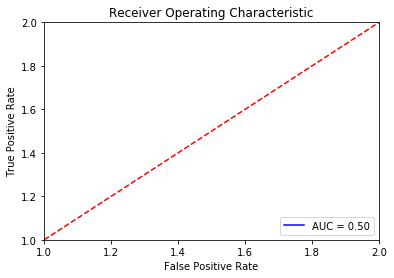

In [644]:
# calculate the fpr and tpr for all thresholds of the classification
probs = regressor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, pos_label =1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([1, 2], [1, 2],'r--')
plt.xlim([1, 2])
plt.ylim([1, 2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [652]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    """Generate a library of base learners."""
    #nb = GaussianNB()
    #svc = SVC(C=100, probability=True)
    #knn = KNeighborsClassifier(n_neighbors=3)
    lr = regressor #LogisticRegression(C=100, random_state=SEED)
   # nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    #gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    #rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {#'svm': svc,
              #'knn': knn,
              #'naive bayes': nb,
              #'mlp-nn': nn,
              #'random forest': rf,
              #'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")
    

In [675]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
logistic... done
Done.

Scoring models.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Data is not binary and pos_label is not specified

ValueError: Data is not binary and pos_label is not specified

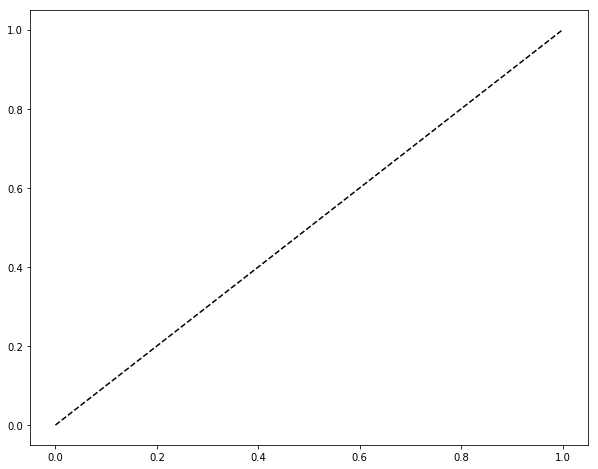

In [569]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        P = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, P)
        plt.plot(fpr, tpr, label=labels[iA], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")




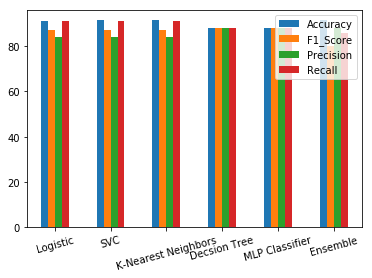

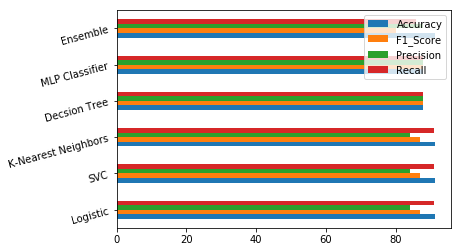

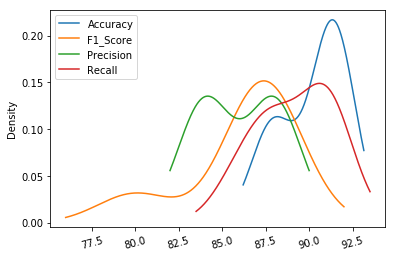

In [229]:
Precision = [84,84,84,88,88,88]
Recall = [91,91,91,88,88,86]
F1_Score = [87,87,87,88,88,80]
Accuracy = [91.25,91.41,91.41,87.94,87.94,91.41]
index = ['Logistic', 'SVC','K-Nearest Neighbors', 'Decsion Tree', 'MLP Classifier', 'Ensemble']
df = pd.DataFrame({'Precision': Precision,'Recall': Recall,'F1_Score':F1_Score,'Accuracy':Accuracy}, index=index)
ax = df.plot.bar(rot=15)
width = 8
ax = df.plot.barh(rot=15)
ax = df.plot.kde(rot=15)

In [130]:
Precision = [84,84,84,88,88,88]
Recall = [91,91,91,88,88,86]
F1_Score = [87,87,87,88,88,80]
Accuracy = [91.25,91.41,91.41,87.94,87.94,91.41]
index = ['Logistic', 'SVC','K-Nearest Neighbors', 'Decsion Tree', 'MLP Classifier', 'Ensemble']
df = pd.DataFrame({'Precision': Precision,'Recall': Recall,'F1_Score':F1_Score,'Accuracy':Accuracy}, index=index)
ax = df.plot.line(x=['Logistic','SVC'], y='Precision')

KeyError: 'Logistic'